# Caja negra de visualizaciones para mi EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df_shark = pd.read_csv(r'..\data\shark_attack_clean.csv')
df_tourism = pd.read_csv(r'../data/turismo_mundial.csv')
df_totales = pd.read_csv(r'../data/totales.csv')



In [38]:
df_tourism['totales'] = df_tourism.sum(axis=1,skipna=True, numeric_only=True)/2
df_tourism

,Unnamed: 0,pais,1995,1996,1997,1998,1999,2000,2001,2002,...,2018,2019,2020,2021,2022,2023,2024,1994,1993,totales
0,0,españa,32971000.0,34027000.0,39553000.0,41892000.0,45440000.0,46402926.0,48565344.0,50330623.0,...,82808413.0,83509153.0,18933103.0,31180802.0,71659281.0,85169050.0,93759297.0,NaN,NaN,1.708708e+09
1,1,alemania,14847000.0,15205000.0,15837000.0,16511000.0,17116000.0,18983000.0,17861000.0,17969000.0,...,38881000.0,39563000.0,12449000.0,11688000.0,28463000.0,NaN,NaN,NaN,NaN,6.806840e+08
2,2,reino-unido,21719000.0,22936000.0,23215000.0,23710000.0,23341000.0,23212000.0,20982000.0,22307000.0,...,38664000.0,39418000.0,10714000.0,6287000.0,30741000.0,NaN,NaN,NaN,NaN,7.720790e+08
3,3,francia,60033000.0,62406000.0,66591000.0,70109000.0,73147000.0,77190000.0,75202000.0,77012000.0,...,89322000.0,90914000.0,41684000.0,48395000.0,NaN,NaN,NaN,NaN,NaN,2.031578e+09
4,4,italia,31052000.0,34080000.0,34692000.0,34933000.0,36516000.0,41181000.0,39563000.0,39799000.0,...,61567200.0,64513000.0,25190000.0,26888000.0,49811000.0,NaN,NaN,NaN,NaN,1.197400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,samoa,68000.0,73000.0,68000.0,78000.0,85000.0,88000.0,88000.0,89000.0,...,164000.0,172000.0,23100.0,2600.0,49400.0,NaN,NaN,NaN,NaN,2.820673e+06
174,174,yemen,61000.0,74000.0,80000.0,88000.0,58000.0,73000.0,76000.0,98000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.053537e+07
175,175,sudáfrica,4488000.0,4915000.0,4976000.0,5732000.0,5890000.0,5872000.0,5787000.0,6430000.0,...,10472000.0,10227500.0,2802000.0,2256000.0,5698000.0,NaN,NaN,NaN,NaN,2.041087e+08
176,176,zambia,163000.0,264000.0,341000.0,362000.0,404000.0,457000.0,492000.0,565000.0,...,1072000.0,1266000.0,502000.0,554000.0,NaN,NaN,NaN,NaN,NaN,1.856818e+07


In [42]:
total_x_pais_ataque = df_shark.groupby('country').count().iloc[:, 0].to_frame().reset_index()


In [49]:
total_x_pais_ataque.head(2)

,country,Unnamed: 0
0,ADMIRALTY ISLANDS,1
1,AMERICAN SAMOA,3


In [43]:
total_x_pais_ataque['country'].to_list()

['ADMIRALTY ISLANDS',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH OVERSEAS TERRITORY',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COLUMBIA',
 'COMOROS',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'DIEGO GARCIA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'GABON',
 'GRAND CAYMAN',
 'GREECE',
 'GRENADA',
 'GUAM',
 'GUATEMALA',
 'GULF OF ADEN',
 'HONDURAS',
 'HONG KONG',
 'ICELAND',
 'INDIA',
 'INDIAN OCEAN',
 'INDONESIA',
 'IRAN',
 'IRAN / IRAQ',
 'IRAQ',
 'IRELAND',
 'ISRAEL',
 'ITALY',
 'ITALY / CROATIA',
 'JAMAICA',
 '

In [40]:
total_x_pais_turista = df_tourism[['pais', 'totales']]
total_x_pais_turista['pais'] = total_x_pais_turista['pais'].str.upper() 
total_x_pais_turista

C:\Users\Vicen\AppData\Local\Temp\ipykernel_11508\3069502710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pais,totales
0,ESPAÑA,1.708708e+09
1,ALEMANIA,6.806840e+08
2,REINO-UNIDO,7.720790e+08
3,FRANCIA,2.031578e+09
4,ITALIA,1.197400e+09
...,...,...
173,SAMOA,2.820673e+06
174,YEMEN,1.053537e+07
175,SUDÁFRICA,2.041087e+08
176,ZAMBIA,1.856818e+07


In [44]:
total_x_pais_turista['pais'].to_list()

['ESPAÑA',
 'ALEMANIA',
 'REINO-UNIDO',
 'FRANCIA',
 'ITALIA',
 'PORTUGAL',
 'ESTADOS-UNIDOS',
 'JAPÓN',
 'CHINA',
 'ANDORRA',
 'EMIRATOS-ÁRABES-UNIDOS',
 'ANTIGUA-BARBUDA',
 'ALBANIA',
 'ARMENIA',
 'ANGOLA',
 'ARGENTINA',
 'AUSTRIA',
 'AUSTRALIA',
 'AZERBAIYÁN',
 'BOSNIA-HERZEGOVINA',
 'BARBADOS',
 'BANGLADÉS',
 'BÉLGICA',
 'BURKINA-FASO',
 'BULGARIA',
 'BARÉIN',
 'BURUNDI',
 'BENIN',
 'BRUNÉI',
 'BOLIVIA',
 'BRASIL',
 'BAHAMAS',
 'BUTÁN',
 'BOTSUANA',
 'BIELORRUSIA',
 'BELICE',
 'CANADÁ',
 'REPÚBLICA-CENTROAFRICANA',
 'SUIZA',
 'CHILE',
 'CAMERÚN',
 'COLOMBIA',
 'COSTA-RICA',
 'CUBA',
 'CABO-VERDE',
 'CHIPRE',
 'YIBUTI',
 'DINAMARCA',
 'DOMINICA',
 'REPÚBLICA-DOMINICANA',
 'ARGELIA',
 'ECUADOR',
 'ESTONIA',
 'EGIPTO',
 'ERITREA',
 'ETIOPÍA',
 'FINLANDIA',
 'FIYI',
 'GABÓN',
 'GRANADA',
 'GEORGIA',
 'GHANA',
 'GAMBIA',
 'GUINEA',
 'GRECIA',
 'GUATEMALA',
 'GUINEA-BISÁU',
 'GUYANA',
 'HONG-KONG',
 'HONDURAS',
 'CROACIA',
 'HAITÍ',
 'HUNGRÍA',
 'INDONESIA',
 'IRLANDA',
 'ISRAEL',
 'INDI

In [45]:
mapeo_paises = {
    'ESPAÑA': 'SPAIN',
    'ESTADOS-UNIDOS': 'USA',
    'EMIRATOS-ÁRABES-UNIDOS': 'UNITED ARAB EMIRATES',
    'AZERBAIYÁN': 'AZORES',
    'BOSNIA-HERZEGOVINA': 'THE BALKANS',
    'BÉLGICA': 'BELGIUM',
    'BURKINA-FASO': 'BURKINA FASO',
    'BULGARIA': 'BULGARIA',
    'BARÉIN': 'BAHRAIN',
    'BURUNDI': 'BURUNDI',
    'ANGOLA': 'ANGOLA',
    'ANTIGUA-BARBUDA': 'ANTIGUA',
    'ARGENTINA': 'ARGENTINA',
    'AUSTRALIA': 'AUSTRALIA',
    'BAHAMAS': 'BAHAMAS',
    'BANGLADÉS': 'BANGLADESH',
    'BARBADOS': 'BARBADOS',
    'BELICE': 'BELIZE',
    'BRASIL': 'BRAZIL',
    'CANADÁ': 'CANADA',
    'CABO-VERDE': 'CAPE VERDE',
    'CHILE': 'CHILE',
    'CHINA': 'CHINA',
    'COLOMBIA': 'COLOMBIA',
    'COSTA-RICA': 'COSTA RICA',
    'CUBA': 'CUBA',
    'ECUADOR': 'ECUADOR',
    'EGIPTO': 'EGYPT',
    'EL-SALVADOR': 'EL SALVADOR',
    'FIYI': 'FIJI',
    'FRANCIA': 'FRANCE',
    'GABÓN': 'GABON',
    'GRANADA': 'GRENADA',
    'GRECIA': 'GREECE',
    'GUATEMALA': 'GUATEMALA',
    'HONDURAS': 'HONDURAS',
    'HONG-KONG': 'HONG KONG',
    'INDIA': 'INDIA',
    'INDONESIA': 'INDONESIA',
    'IRÁN': 'IRAN',
    'IRAK': 'IRAQ',
    'IRLANDA': 'IRELAND',
    'ISRAEL': 'ISRAEL',
    'ITALIA': 'ITALY',
    'JAMAICA': 'JAMAICA',
    'JAPÓN': 'JAPAN',
    'JORDANIA': 'JORDAN',
    'KENIA': 'KENYA',
    'KIRIBATI': 'KIRIBATI',
    'COMORAS': 'COMOROS',
    'SRI-LANKA': 'SRI LANKA',
    'MÓNACO': 'MONACO',
    'MONTENEGRO': 'MONTENEGRO',
    'MADAGASCAR': 'MADAGASCAR',
    'MALASIA': 'MALAYSIA',
    'MALDIVAS': 'MALDIVES',
    'MALTA': 'MALTA',
    'MAURICIO': 'MAURITIUS',
    'MÉXICO': 'MEXICO',
    'MOZAMBIQUE': 'MOZAMBIQUE',
    'NAMIBIA': 'NAMIBIA',
    'NIGERIA': 'NIGERIA',
    'NICARAGUA': 'NICARAGUA',
    'NUEVA-ZELANDA': 'NEW ZEALAND',
    'PANAMÁ': 'PANAMA',
    'PAPÚA-NUEVA-GUINEA': 'PAPUA NEW GUINEA',
    'FILIPINAS': 'PHILIPPINES',
    'PORTUGAL': 'PORTUGAL',
    'RUSIA': 'RUSSIA',
    'SAMOA': 'SAMOA',
    'SAN-CRISTÓBAL-NIEVES': 'SAN CRISTOBAL Y NIEVES',
    'SENEGAL': 'SENEGAL',
    'SEYCHELLES': 'SEYCHELLES',
    'SIERRA-LEONA': 'SIERRA LEONE',
    'SINGAPUR': 'SINGAPORE',
    'SUDÁN': 'SUDAN',
    'SUDÁFRICA': 'SOUTH AFRICA',
    'TAILANDIA': 'THAILAND',
    'TAIWAN': 'TAIWAN',
    'TANZANIA': 'TANZANIA',
    'TRINIDAD-TOBAGO': 'TRINIDAD & TOBAGO',
    'URUGUAY': 'URUGUAY',
    'VENEZUELA': 'VENEZUELA',
    'VANUATU': 'VANUATU',
    'YEMEN': 'YEMEN'
}


In [46]:
total_x_pais_turista['pais'] = total_x_pais_turista['pais'].replace(mapeo_paises)
len(total_x_pais_turista['pais'])

C:\Users\Vicen\AppData\Local\Temp\ipykernel_11508\3425259025.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



178

In [47]:
total_x_pais_turista.head()

,pais,totales
0,SPAIN,1.708708e+09
1,ALEMANIA,6.806840e+08
2,REINO-UNIDO,7.720790e+08
3,FRANCE,2.031578e+09
4,ITALY,1.197400e+09


In [50]:
df_totalXpais = pd.merge(total_x_pais_ataque, total_x_pais_turista, left_on='country', right_on='pais')
len(df_totalXpais)

81

In [57]:
df_totalXpais.rename(columns={'Unnamed: 0':'totales_ataques', 'totales': 'totales_turistas'}, inplace=True)
df_totalXpais.drop('pais', axis=1, inplace=True)
df_totalXpais.head(2)

,country,totales_ataques,totales_turistas
0,ANGOLA,1,6491014.0
1,ANTIGUA,1,6641511.0


In [58]:
df_totalXpais.to_csv(r'C:\Users\Vicen\Visual Code\The_Bridge\Personal_2506_dsft_thebridge\2-Analytics\EDA\EDA-SHARK-ATTACK\src\data\totales_x_pais.csv')

In [24]:
df_shark[df_shark['type'] == 'Invalid']

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,species,activity2,decade
19,19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17.0,N,Reported as shark bite but injury caused by st...,Boogie boarding,2010
23,23,2017-09-24,2017,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33.0,UNKNOWN,Questionable,Surfing,2010
35,35,2015-11-07,2015,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,9.0,UNKNOWN,Shark involvement not confirmed,Surfing,2010
74,74,2009-04-11,2009,Invalid,USA,Hawaii,Kona,Spearfishing,Paolo Dominici,M,49,UNKNOWN,Shark involvement not confirmed,Fishing,2000
77,77,2008-04-18,2008,Invalid,MEXICO,Quintana Roo,"Delfines Beach, Cancun",Swimming,Joram Galleros Villanueva,M,32,UNKNOWN,"Reported by media as shark attack, but shark i...",Swimming,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,6788,1969-02-01,1969,Invalid,AUSTRALIA,Queensland,Cooktown,Hard hat diving,Elin Anderson,M,52,UNKNOWN,Questionable incident,Diving,1960
5690,6803,1961-11-14,1961,Invalid,MEXICO,Guerrrero,Northwest of Acapulco,NaN,Unknow,F,Unknow,UNKNOWN,Shark involvement prior to death was not confi...,No details,1960
5706,6819,1957-01-01,1957,Invalid,SRI LANKA,Western Province,Colombo Harbor,Fishing,F. L. Fernando,M,Unknow,UNKNOWN,Shark involvement prior to death was not confi...,Fishing,1950
5715,6828,1955-01-01,1955,Invalid,USA,Illinois,Chicago (Lake Michigan),Swimming,George Lawson,M,Unknow,UNKNOWN,Questionable incident,Swimming,1950


In [62]:
df_shark.groupby('country').agg('size').sort_values(ascending=False).to_frame().reset_index().rename(columns={0:'count'})

,country,count
0,USA,2268
1,AUSTRALIA,1185
2,SOUTH AFRICA,546
3,PAPUA NEW GUINEA,131
4,BAHAMAS,122
...,...,...
163,SUDAN?,1
164,ST KITTS / NEVIS,1
165,TURKS AND CAICOS,1
166,URUGUAY,1


In [25]:
df_totales.head(2)

,Unnamed: 0,year,count_turistas,year.1,count_ataques,porcentaje
0,0,1995,244795350.0,1995.0,64,0.000026
1,1,1996,258435067.0,1996.0,49,0.000019


In [28]:
df_totales['count_ataques'].sum()

np.int64(2618)

In [8]:
df_shark.drop(['Unnamed: 0', 'age'], axis=1, inplace=True)
df_tourism.drop(['Unnamed: 0', '1994', '1993', '2023', '2024'], axis=1, inplace=True)

In [29]:
df_tourism.head()

,Unnamed: 0,pais,1995,1996,1997,1998,1999,2000,2001,2002,...,2017,2018,2019,2020,2021,2022,2023,2024,1994,1993
0,0,españa,32971000.0,34027000.0,39553000.0,41892000.0,45440000.0,46402926.0,48565344.0,50330623.0,...,81868522.0,82808413.0,83509153.0,18933103.0,31180802.0,71659281.0,85169050.0,93759297.0,NaN,NaN
1,1,alemania,14847000.0,15205000.0,15837000.0,16511000.0,17116000.0,18983000.0,17861000.0,17969000.0,...,37452000.0,38881000.0,39563000.0,12449000.0,11688000.0,28463000.0,NaN,NaN,NaN,NaN
2,2,reino-unido,21719000.0,22936000.0,23215000.0,23710000.0,23341000.0,23212000.0,20982000.0,22307000.0,...,39543000.0,38664000.0,39418000.0,10714000.0,6287000.0,30741000.0,NaN,NaN,NaN,NaN
3,3,francia,60033000.0,62406000.0,66591000.0,70109000.0,73147000.0,77190000.0,75202000.0,77012000.0,...,86758000.0,89322000.0,90914000.0,41684000.0,48395000.0,NaN,NaN,NaN,NaN,NaN
4,4,italia,31052000.0,34080000.0,34692000.0,34933000.0,36516000.0,41181000.0,39563000.0,39799000.0,...,58253000.0,61567200.0,64513000.0,25190000.0,26888000.0,49811000.0,NaN,NaN,NaN,NaN


In [10]:
df_shark.head()

,date,year,type,country,area,location,activity,name,sex,fatal_y_n,species,activity2
0,2023-05-13,2023,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,Y,White shark,Surfing
1,2023-04-29,2023,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,N,1m shark,Swimming
2,2022-10-07,2022,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,N,Bull shark,Fishing
3,2021-10-04,2021,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,N,Unknow,Surfing
4,2021-10-03,2021,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,N,Unknow,Swimming


In [11]:
country_dist = df_shark.loc[:,'country'].value_counts().to_frame().reset_index()
country_dist = country_dist[country_dist['count'] > 5]
df_shark_country = df_shark[df_shark['country'].isin(country_dist['country'])]
orden = df_shark_country['country'].value_counts().sort_values(ascending=False)


In [12]:
plt.style.use('default')

In [73]:
df_shark.sample(10)

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,species,activity2,decade
4288,5105,1927-01-01,1927,Unprovoked,AUSTRALIA,Torres Strait,Thursday Island,Pearl diving,Dick Lahou,M,Unknow,N,Unknow,Diving,1920
2143,2577,1984-02-12,1984,Invalid,SOUTH AFRICA,Eastern Cape Province,St. George’s Strand,NaN,Unknow,F,Unknow,UNKNOWN,Shark involvement prior to death was not confi...,No details,1980
1422,1705,2023-03-17,2023,Questionable,MEXICO,Quintana Roo,Cancún,Swimming,Dillon Armijo,M,10,N,Authorities report injury caused bya barracuda,Swimming,2020
3958,4741,2006-08-22,2006,Invalid,BELIZE,Ambergris Caye,Near Ramon's Village,Spearfishing,Isaul Coba,M,34,UNKNOWN,Shark involvement prior to death was not confi...,Fishing,2000
4369,5228,2008-05-14,2008,Unprovoked,FIJI,Yasawa Islands,Turtle Island,Night diving,Aisake Sadole,M,28,Y,Unknow,Diving,2000
3108,3724,2012-11-22,2012,Unprovoked,MEXICO,Sinaloa,Nuevo Altata,Swimming,Fernando Cardenas Garcia,M,32,Y,2.5 m shark,Swimming,2010
972,1135,1968-12-01,1968,Invalid,SOUTH AFRICA,KwaZulu-Natal,KwaZulu-Natal,NaN,Jasper Gwynn,M,30,UNKNOWN,Questionable incident,No details,1960
935,1098,1988-03-25,1988,Unprovoked,USA,Hawaii,"Running Waters Beach, Ninini Point, Kaua'i",Body surfing,Aaron Kawado,M,Unknow,N,Unknow,Surfing,1980
583,656,1961-05-17,1961,Unprovoked,NEW BRITAIN,East New Britain Province,Kokopo,Collecting dynamited fish,male,M,Unknow,N,Unknow,Collecting,1960
3133,3749,2006-09-18,2006,Provoked,USA,Florida,"Off Key Largo, Monroe County",Diving / Kissing the shark,Dave Marcel,M,Unknow,N,Nurse shark,Diving,2000


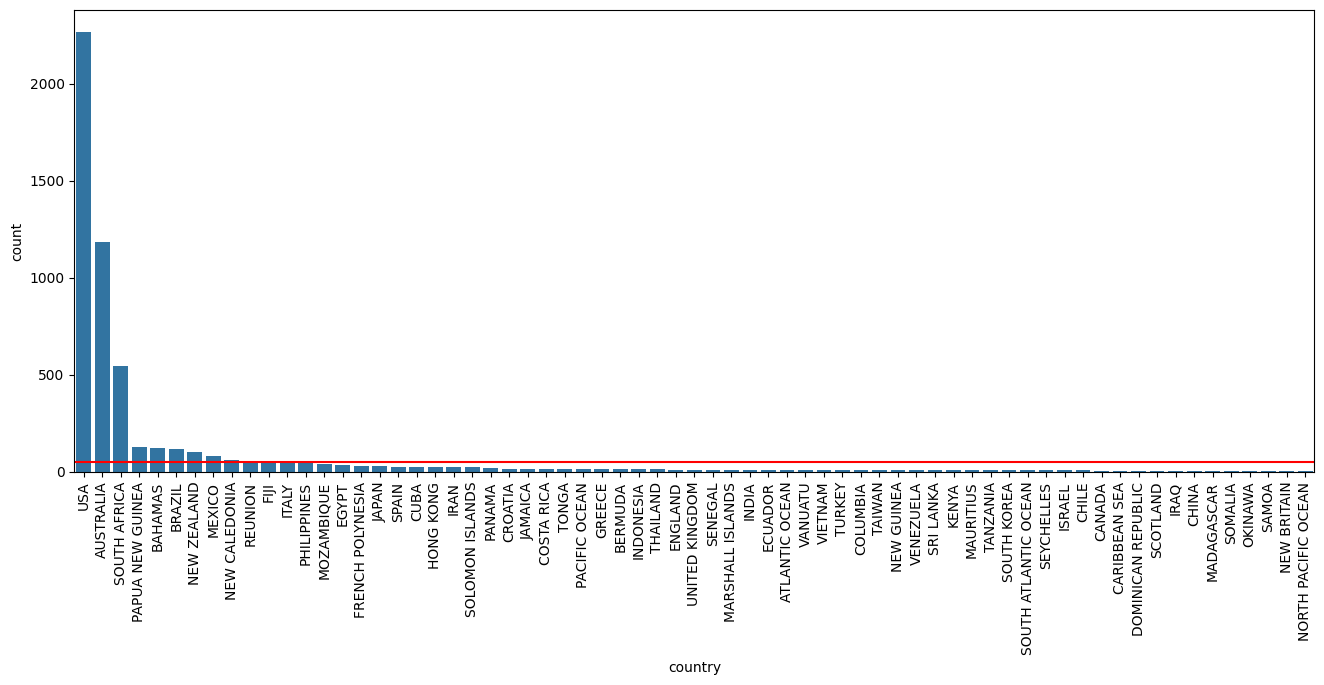

In [13]:
# Cuantas ataques por pais en los últimos 100 años
plt.figure(figsize=(16,6))
sns.countplot(df_shark_country, x='country', order=orden.index)
plt.axhline(y=50, color='red', linestyle='-', label='Total de 50 muertes')
plt.xticks(rotation= 90);


In [64]:
df_shark.loc[df_shark['type'].isin(['Unprovoked', 'Provoked', 'UNKNOWN']), 'type'].value_counts()


type
Unprovoked    4221
Provoked       565
Name: count, dtype: int64

In [15]:
fig = px.bar(type_count, type_count.index, type_count['count'], color=type_count.index)
fig.add_annotation(x='Unprovoked', y=800, text="Únicos que pasan", showarrow=True, arrowhead=1, arrowsize=3, arrowcolor='red', bgcolor='red')
fig.add_hline(1000, line_width=3, line_dash="dash", line_color="green", annotation_text="Linea de tendencia", 
              annotation_position="bottom right")
fig.add_vrect(y0=0, y1=0.2, x0='Provoked', x1='Invalid',line_width=0, fillcolor="red", opacity=0.2)


In [16]:
attack_x_country = df_shark['country'].value_counts().sort_values(ascending=False).reset_index()
attack_x_country = attack_x_country[attack_x_country['count'] > 5]
px.bar(attack_x_country, x='country', y='count')


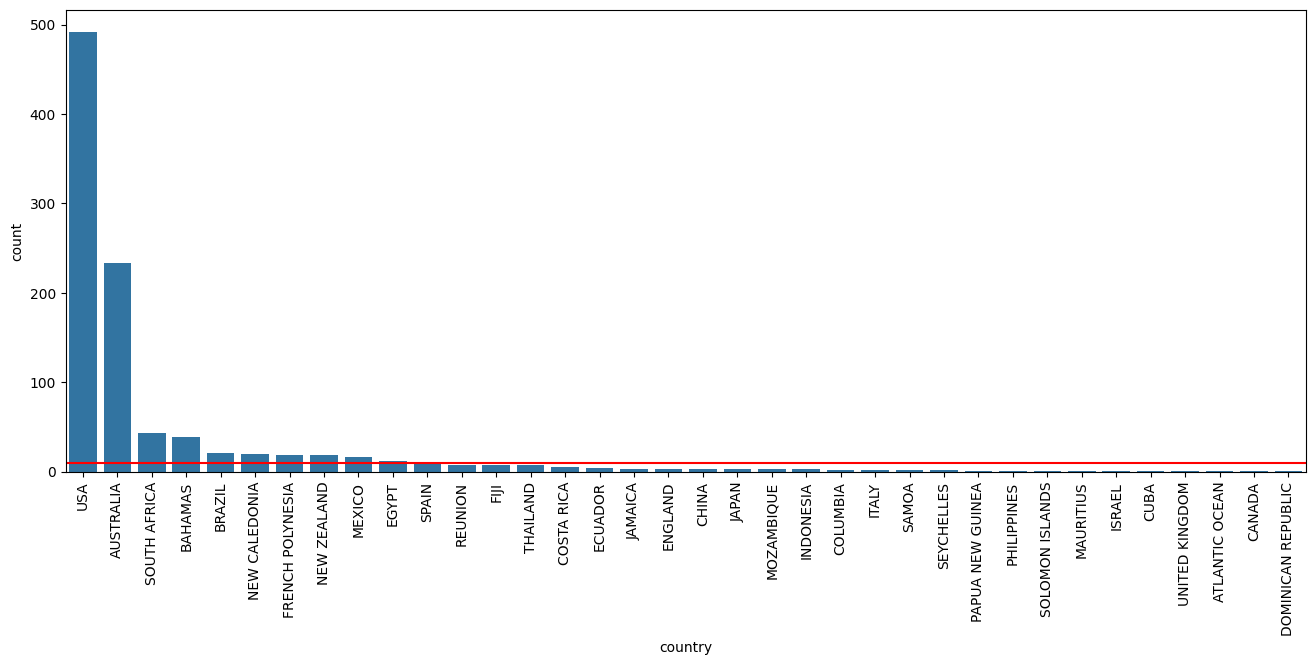

In [17]:
# Cuantas ataques por pais en los últimos 10 
country_10_anos = df_shark_country[df_shark_country['year'] > 2014]
orden2 = country_10_anos['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.countplot(country_10_anos, x='country', order= orden2.index)
plt.axhline(y=10, color='red', linestyle='-', label='Total de 10 muertes')
plt.xticks(rotation= 90);

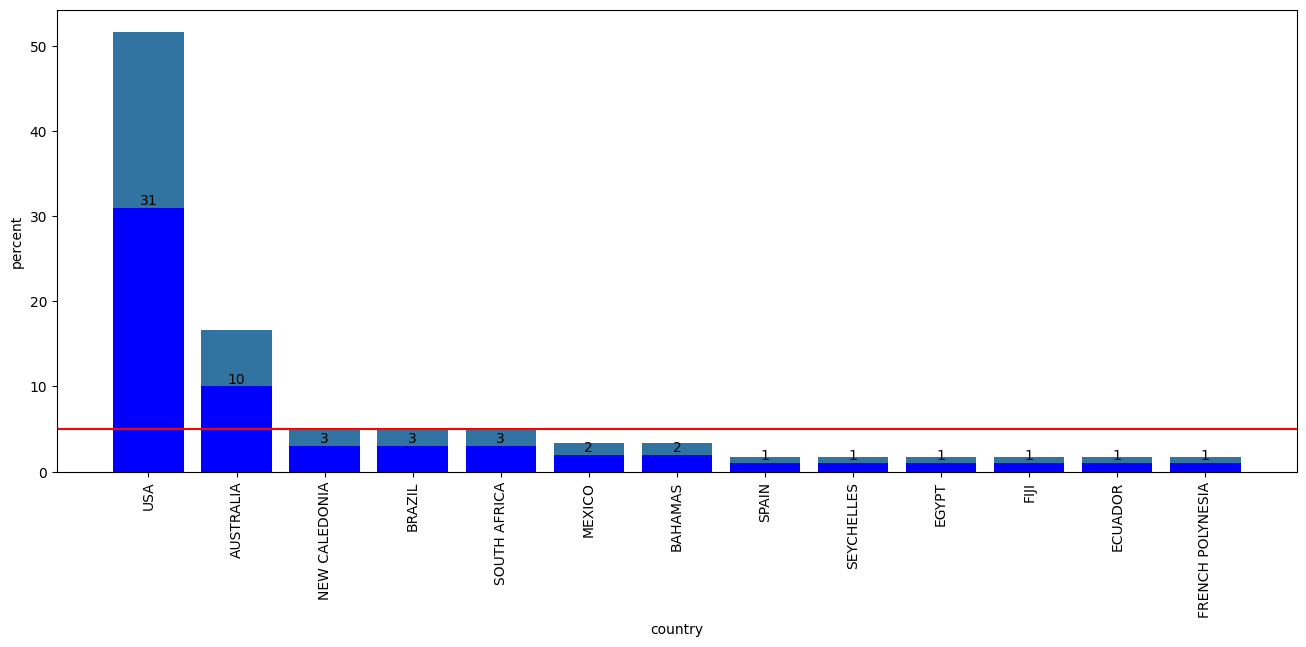

In [18]:
# Cuantas ataques por pais en el último año
country_1_ano = df_shark_country[df_shark_country['year'] == 2023]
orden3 = country_1_ano['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.countplot(country_1_ano, x='country', order= orden3.index, stat='percent')
plt.axhline(y=5, color='red', linestyle='-', label='Total de 5 muertes')
barras = plt.bar(x= orden3.index, height=orden3.values, color='blue')
plt.bar_label(barras)
plt.xticks(rotation= 90);

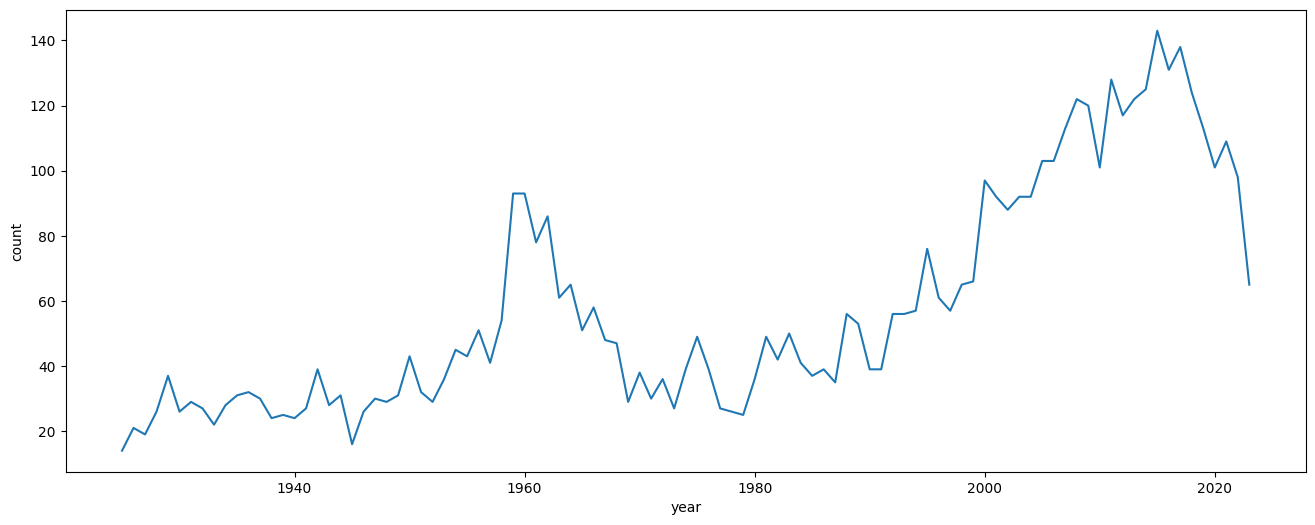

In [19]:
# Ataques por año
anos_disp= df_shark['year'].value_counts().sort_index(ascending=True).to_frame().reset_index()
plt.figure(figsize=(16,6))
sns.lineplot(data=anos_disp, x="year", y="count");


In [20]:
anos_tourism = df_tourism.iloc[:,1:].sum(axis=0).to_frame()
anos_tourism = anos_tourism/2


In [ ]:
# Ajuste de línea de regresión lineal
coef = np.polyfit(anos_disp['year'], anos_disp['count'], 1)
poly1d_fn = np.poly1d(coef)

# Crear gráfico base con plotly express
fig = px.line(anos_disp, x="year", y="count", title="Con línea de tendencia")

# Añadir línea de tendencia
fig.add_trace(go.Scatter(
    x=anos_disp['year'],
    y=poly1d_fn(anos_disp['year']),
    mode='lines',
    name='Tendencia',
    line=dict(color='red', dash='dash')
))

fig.show()


In [44]:
# Ajuste de línea de regresión lineal
coef = np.polyfit(anos_tourism.index, anos_tourism[0], 1)
poly1d_fn = np.poly1d(coef)

# Crear gráfico base con plotly express
fig = px.line(anos_tourism, x=anos_tourism.index, y=0, title="Con línea de tendencia")

# Añadir línea de tendencia
fig.add_trace(go.Scatter(
    x=anos_tourism.index,
    y=poly1d_fn(anos_tourism.index),
    mode='lines',
    name='Tendencia',
    line=dict(color='red', dash='dash')  # Puedes personalizar estilo
))

fig.show()

In [22]:
display(px.line(anos_disp, x="year", y="count"))
display(px.line(anos_tourism, x=anos_tourism.index, y=0))

In [3]:
# Ataques por actividad
df_shark['decade'] = (df_shark['year'] // 10 * 10).astype(int)


In [4]:
# Agrupar por década y actividad, y contar
activity_counts = df_shark.groupby(['decade', 'activity']).size().reset_index(name='count')

# Para cada década, seleccionar las 5 actividades más comunes
top5_by_decade = (
    activity_counts.groupby('decade')
    .apply(lambda x: x.nlargest(5, 'count'))
    .reset_index(drop=True)
)

# Ahora unimos con país para graficar después
df_top5 = df_shark.merge(top5_by_decade[['decade', 'activity']], on=['decade', 'activity'])

C:\Users\Vicen\AppData\Local\Temp\ipykernel_11508\1335956813.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'count'))


In [5]:
summary = (
    df_top5.groupby(['decade', 'activity', 'country'])
    .size()
    .reset_index(name='count')
)

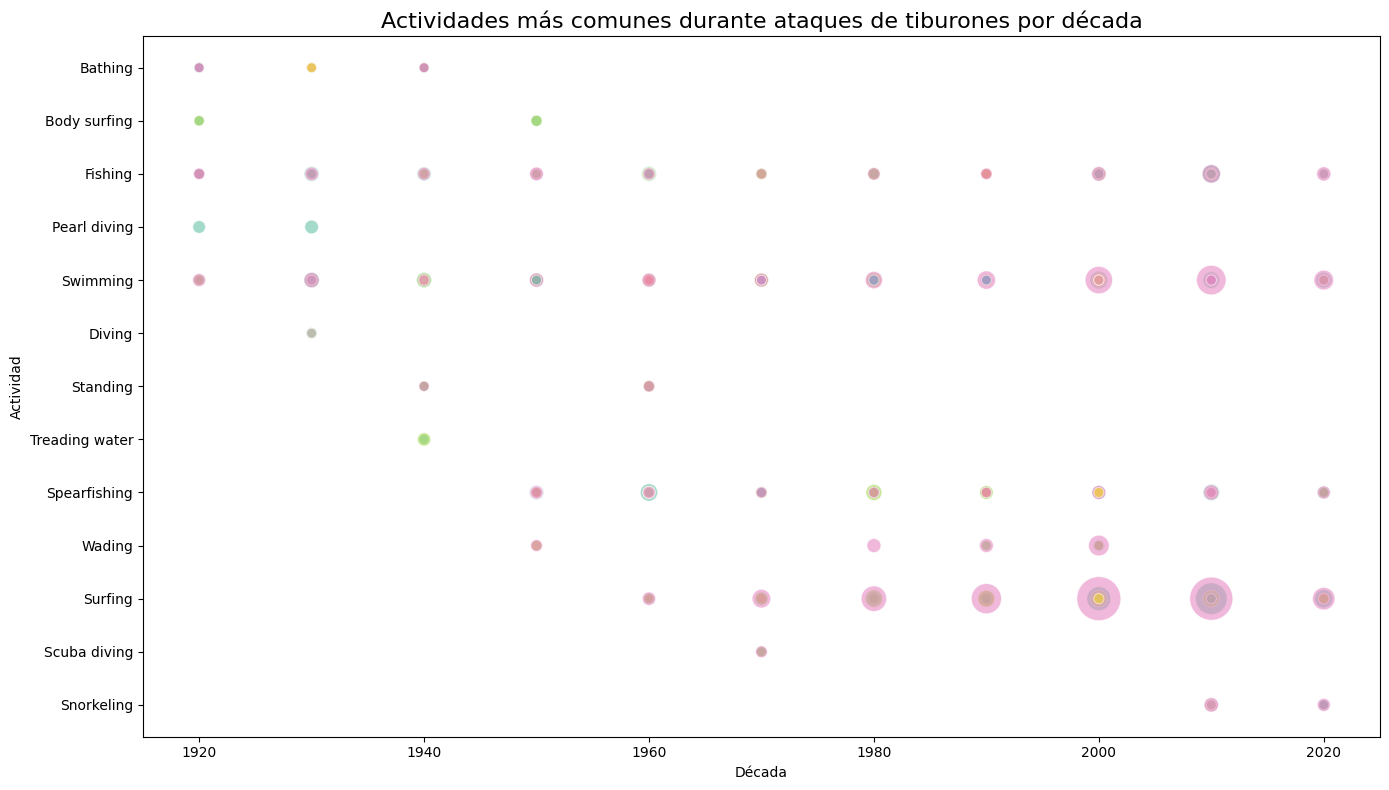

In [26]:
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=summary,
    x='decade',
    y='activity',
    size='count',
    hue='country',
    sizes=(50, 1000),
    alpha=0.6,
    palette='Set2',
    legend=False
)

plt.title('Actividades más comunes durante ataques de tiburones por década', fontsize=16)
plt.xlabel('Década')
plt.ylabel('Actividad')
plt.tight_layout()
plt.show();

In [21]:
fig = px.scatter(
    summary,
    x="decade",
    y="activity",
    size="count",
)
fig.add_shape(
    type="rect",
    x0=1960,
    x1=1990,
    y0=9,
    y1=11,
    fillcolor="green",
    opacity=0.3,
    line_width=0,
    layer="below"
)
fig.add_vrect(x0= 1940, x1=1960, line_width=0, fillcolor="red", opacity=0.2)
fig.add_hrect(y0=4, y1=7, line_width=0, fillcolor="green", opacity=0.2)
fig.show()

In [28]:
df_shark2 = pd.read_csv(r'..\data\shark_attack_enriquecido.csv')

In [29]:
decades = []
for i in df_shark2['decade'].unique():
    try:
        decades.append(int(i))
    except:
        continue
decades


[2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920]

In [30]:
df_shark2[df_shark2['decade'] == str(decades[-1])]

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,fatal_y_n,species,activity2,decade,geolocalizacion,ocio_o_no,lat,lon
208,208,1928-06-24 00:00:00,1928,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Swimming,Jim Stevens,M,N,Unknow,Swimming,1920,"(27.7567667, -81.4639835)",Ocio,27.7567667,-81.4639835
209,209,1928-02-01 00:00:00,1928,Unprovoked,COSTA RICA,Near Puntarenas,Near Puntarenas,Swimming,Armando Chavez,M,N,Unknow,Swimming,1920,NaN,Ocio,NaN,NaN
210,210,1928-01-01 00:00:00,1928,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Tugela River Mouth,Standing,N'gena Zakali,M,N,Unknow,Standing,1920,"(-28.503833, 30.8875009)",No ocio,-28.503833,30.8875009
211,211,1926-07-08 00:00:00,1926,Unprovoked,USA,California,"San Francisco Bay (or San Leandro Bay), near c...",Swimming with dog near canning factory,Norman Piexotto,M,N,1.5 m [5'] white shark or sevengill shark,Swimming,1920,"(36.7014631, -118.755997)",Ocio,36.7014631,-118.755997
212,212,1926-01-01 00:00:00,1926,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Swimming to mail boat,Mr. Daniels,M,UNKNOWN,Unknow,Swimming,1920,"(-33.546977, 20.72753)",Ocio,-33.546977,20.72753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,5331,1928-04-06 00:00:00,1928,Unprovoked,AUSTRALIA,Queensland,Graceville,Bathing,Noel Arthy,M,N,4' shark,Bathing,1920,"(-22.1646782, 144.5844903)",No ocio,-22.1646782,144.5844903
5530,5530,1929-12-21 00:00:00,1929,Unprovoked,AUSTRALIA,Torres Strait,Thursday Island,Diving,male,M,N,Unknow,Diving,1920,"(-10.416667, 142.166667)",Ocio,-10.416667,142.166667
5531,5531,1929-04-26 00:00:00,1929,Unprovoked,AUSTRALIA,Queensland,Great Barrier Reef,Diving for trepang,Ali Ah Mat,M,N,Unknow,Diving,1920,"(-22.1646782, 144.5844903)",Ocio,-22.1646782,144.5844903
5735,5735,1929-12-16 00:00:00,1929,Unprovoked,AUSTRALIA,New South Wales,Collaroy,Bathing or body surfing,Nancy Thom,F,N,a small shark,Surfing,1920,"(-31.8759835, 147.2869493)",Ocio,-31.8759835,147.2869493


In [32]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])

type_counts = df_shark2['type'].value_counts()
fig.add_trace(go.Pie(labels=type_counts.index, values=type_counts.values,
                     title={'text': 'Tipo de Ataque', 'font': {'size': 18}}), row=1, col=1)

sex_counts = df_shark2['sex'].value_counts()
fig.add_trace(go.Pie(labels=sex_counts.index, values=sex_counts.values,
                     title={'text': 'Sexo', 'font': {'size': 18}}), row=1, col=2)

fatal_counts = df_shark2['fatal_y_n'].value_counts()
fig.add_trace(go.Pie(labels=fatal_counts.index, values=fatal_counts.values,
                     title={'text': '¿Fatal?', 'font': {'size': 18}}), row=2, col=1)

ocio_counts = df_shark2['ocio_o_no'].value_counts()
fig.add_trace(go.Pie(labels=ocio_counts.index, values=ocio_counts.values,
                     title={'text': 'Actividad de Ocio o no', 'font': {'size': 18}}), row=2, col=2)

fig.update_layout(
    title={
        'text': "Resumen de Ataques de Tiburón",
        'font': {'size': 28},     
        'x': 0.5,                 
        'xanchor': 'center'       
    },
    showlegend= False,
    height=1000
)

fig.show()


In [33]:

fig = px.line(df_totales, x='year', y='porcentaje')
fig.update_layout(yaxis_autorange="reversed")
fig.add_hline(0.000021, line_width=3, line_dash="dash", line_color="red" )
fig.show()